<a href="https://colab.research.google.com/github/wahyurizasyawal/Tugas-Python-14/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MUHAMMAD WAHYU RIZASYAWAL (1101184146) TT-43-G2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#Nilai-nilai Parameter
frek = [700, 900, 1800]
tipe_pilihan = ['urban', 'suburban', 'open']
ht = 80 #meter
hr = 1.5 #meter
d = np.arange(300, 1001, 3.5) #300 - 1000 dengan jarak 3.5 akan menghasilkan 201 titik
#user = 200
ptx = 30000 #miliwatt
gtx = 10 #dB
grx = 2 #dB
BW = 5000000 #Hz

#Lambda 
NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

#convert
ptx_dbm = NtL(ptx) #dBm

In [4]:
#FUNGSI PATHLOSS 231
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp


In [5]:
#FUNGSI GRAFIK DAYA TERIMA
def daya_terima(PL,ptx, gtx,grx):
  #prx(dbm)
  prx = ptx - PL + gtx + grx
  return prx

In [6]:
#FUNGSI SNR
def snr_rumus(prx,BW):
  No = -174 + 10*np.log10(BW)
  No_num = LtN(No)
  #prx numerik
  SNR = prx/No_num
  return SNR

In [7]:
#FUNGSI KAPASITAS SELULER
def caps(d, SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW * np.log2(hasil_list)
  return kapasitas

In [8]:
#FUNGSI PATHLOSS
#FUNGSI GRAFIK ADA 3 TIPE BERBEDA TETAPI PADA FREKUENSI 1800 MHz
dict_PL = {}
dict_PL_temp = {}
def grafik1_1800(frek,tipe_pilihan):
  f1 = frek[2]
  for i in range(len(tipe_pilihan)):
    tipe = tipe_pilihan[i]
    for i in range(len(d)):
      PL = cos(f1,tipe,ht,hr,d)
    dict_PL_temp[tipe]= PL
  #print(dict_PL_temp)
grafik1_1800(frek,tipe_pilihan)

#FUNGSI GRAFIK ADA 3 FREKUENSI BERBEDA TAPI TIPE URBAN
def grafik2_urban(frek,tipe_pilihan):
  tipe = tipe_pilihan[0]
  for i in range(len(frek)):
    f2 = frek[i]
    for i in range(len(d)):
      PL = cos(f2,tipe,ht,hr,d)
    dict_PL[f2]= PL
  dict_PL[1800]=dict_PL_temp
  #print(dict_PL)
grafik2_urban(frek,tipe_pilihan)

In [9]:
#FUNGSI DAYA TERIMA
#FUNGSI GRAFIK ADA 3 TIPE BERBEDA TETAPI PADA FREKUENSI 1800 MHz
dict_PRX = {}
dict_PRX_temp = {}
hasil_PL1 = []
hasil_PL2 = []
prx_list1 = []
prx_list2 = []

#MEMANGGIL DICT PL AGAR DAPAT DIGUNAKAN PERHITUNGAN 
def grafikprx_1800(ptx,dict_PL, tipe_pilihan):
  for i in range(len(dict_PL[1800])):
    tipe = tipe_pilihan[i]
    for i in range(len(dict_PL[1800][tipe])):
      PL_TEMP1 = dict_PL[1800][tipe][i]
      hasil_PL1.append(PL_TEMP1)
      prx = daya_terima(hasil_PL1,ptx_dbm,gtx,grx)
      prx_num1 = LtN(prx)
  
  #SLICING LIST
  n = len(prx_num1)
  a = n - ((n//3)*2)
  b = n - (n//3)
  prx_list1.append(prx_num1[0:a])
  prx_list1.append(prx_num1[a:b])
  prx_list1.append(prx_num1[b:n])

  #LIST TO DICT
  for i in range(len(dict_PL[1800])):
    tipe = tipe_pilihan[i]
    dict_PRX_temp[tipe]=prx_list1[i]
  #print(dict_PRX_temp)
grafikprx_1800(ptx_dbm,dict_PL,tipe_pilihan)

#FUNGSI GRAFIK ADA 3 FREKUENSI BERBEDA TAPI TIPE URBAN
def grafikprx_urban(ptx,dict_PL,frek):
  for i in range(len(dict_PL)-1):
    fr = frek[i]
    #print(fr)
    PL_TEMP2 = dict_PL[fr]
    hasil_PL2.append(PL_TEMP2)
    prx_list2= daya_terima(hasil_PL2,ptx_dbm,gtx,grx)
    prx_num2 = LtN(prx_list2)
    dict_PRX[fr]=prx_num2[i]
  dict_PRX[1800]=dict_PRX_temp
  print(dict_PRX)
grafikprx_urban(ptx_dbm,dict_PL,frek)

{700: array([2.54571638e-11, 2.45172185e-11, 2.36221664e-11, 2.27693876e-11,
       2.19564421e-11, 2.11810560e-11, 2.04411082e-11, 1.97346187e-11,
       1.90597378e-11, 1.84147364e-11, 1.77979967e-11, 1.72080043e-11,
       1.66433403e-11, 1.61026747e-11, 1.55847596e-11, 1.50884238e-11,
       1.46125671e-11, 1.41561554e-11, 1.37182164e-11, 1.32978349e-11,
       1.28941493e-11, 1.25063478e-11, 1.21336653e-11, 1.17753801e-11,
       1.14308111e-11, 1.10993152e-11, 1.07802851e-11, 1.04731466e-11,
       1.01773568e-11, 9.89240199e-12, 9.61779595e-12, 9.35307822e-12,
       9.09781255e-12, 8.85158538e-12, 8.61400454e-12, 8.38469794e-12,
       8.16331241e-12, 7.94951259e-12, 7.74297986e-12, 7.54341145e-12,
       7.35051947e-12, 7.16403008e-12, 6.98368273e-12, 6.80922939e-12,
       6.64043386e-12, 6.47707113e-12, 6.31892676e-12, 6.16579632e-12,
       6.01748485e-12, 5.87380633e-12, 5.73458324e-12, 5.59964611e-12,
       5.46883308e-12, 5.34198950e-12, 5.21896761e-12, 5.09962613e-12,


In [10]:
#FUNGSI SNR
#FUNGSI GRAFIK ADA 3 TIPE BERBEDA TETAPI PADA FREKUENSI 1800 MHz
dict_SNR = {}
dict_SNR_temp = {}
hasil_PRX1 = []
hasil_PRX2 = []
snr_list3 = []
snr_list4 = []

#MEMANGGIL DICT_PRX AGAR DAPAT DIGUNAKAN PERHITUNGAN 
def grafiksnr_1800(dict_PRX,BW,tipe_pilihan):
  for i in range(len(dict_PRX[1800])):
    tipe = tipe_pilihan[i]
    for i in range(len(dict_PRX[1800][tipe])):
      PRX_TEMP1 = dict_PRX[1800][tipe][i]
      hasil_PRX1.append(PRX_TEMP1)
      No1 = snr_rumus(hasil_PRX1,BW)
      
  #SLICING LIST
  n = len(No1)
  a = n - ((n//3)*2)
  b = n - (n//3)
  snr_list3.append(No1[0:a])
  snr_list3.append(No1[a:b])
  snr_list3.append(No1[b:n])

  #LIST TO DICT
  for i in range(len(dict_PRX[1800])):
    tipe = tipe_pilihan[i]
    dict_SNR_temp[tipe]=snr_list3[i]
  #print(No1)
  #print(dict_SNR_temp)
grafiksnr_1800(dict_PRX,BW,tipe_pilihan)

#FUNGSI GRAFIK ADA 3 FREKUENSI BERBEDA TAPI TIPE URBAN
def grafiksnr_urban(dict_PRX,BW,frek):
  for i in range(len(dict_PRX)-1):
    fr = frek[i]
    #print(fr)
    PRX_TEMP2 = dict_PRX[fr]
    hasil_PRX2.append(PRX_TEMP2)
    snr_list4 = snr_rumus(hasil_PRX2,BW)
    dict_SNR[fr]=snr_list4[i]
  dict_SNR[1800]=dict_SNR_temp
  #print(snr_list4)
  print(dict_SNR)
grafiksnr_urban(dict_PRX,BW,frek)

{700: array([1.27891009, 1.23168937, 1.18672399, 1.14388231, 1.10304178,
       1.06408814, 1.02691485, 0.99142242, 0.95751794, 0.92511453,
       0.89413093, 0.86449105, 0.83612361, 0.8089618 , 0.78294292,
       0.75800814, 0.73410218, 0.71117309, 0.68917203, 0.66805302,
       0.64777277, 0.62829051, 0.60956779, 0.59156835, 0.57425798,
       0.55760439, 0.54157704, 0.5261471 , 0.51128729, 0.49697181,
       0.48317622, 0.46987741, 0.45705344, 0.44468354, 0.43274802,
       0.42122818, 0.41010627, 0.39936546, 0.38898972, 0.37896386,
       0.3692734 , 0.3599046 , 0.35084436, 0.34208022, 0.33360031,
       0.32539334, 0.31744853, 0.3097556 , 0.30230477, 0.29508669,
       0.28809244, 0.2813135 , 0.27474175, 0.26836942, 0.26218908,
       0.25619363, 0.2503763 , 0.24473058, 0.23925026, 0.2339294 ,
       0.2287623 , 0.22374351, 0.21886781, 0.21413018, 0.20952583,
       0.20505016, 0.20069875, 0.19646736, 0.19235194, 0.18834857,
       0.18445352, 0.18066319, 0.17697411, 0.17338297, 0

In [11]:
#FUNGSI KAPASITAS
#FUNGSI GRAFIK ADA 3 TIPE BERBEDA TETAPI PADA FREKUENSI 1800 MHz
dict_CAPS = {}
dict_CAPS_temp = {}
hasil_CAPS1 = []
hasil_CAPS2 = []
caps_list5 = []
caps_list6 = []

#MEMANGGIL DICT_SNR AGAR DAPAT DIGUNAKAN PERHITUNGAN 
def grafikcaps_1800(d, dict_SNR,BW,tipe_pilihan):
  for i in range(len(dict_SNR[1800])):
    tipe = tipe_pilihan[i]
    for i in range(len(dict_SNR[1800][tipe])):
      CAPS_TEMP1 = dict_SNR[1800][tipe][i]
      hasil_CAPS1.append(CAPS_TEMP1)
      caps1 = caps(d, hasil_CAPS1,BW)
  
  #SLICING LIST
  n = len(caps1)
  a = n - ((n//3)*2)
  b = n - (n//3)
  caps_list5.append(caps1[0:a])
  caps_list5.append(caps1[a:b])
  caps_list5.append(caps1[b:n])

  #LIST TO DICT
  for i in range(len(dict_SNR[1800])):
    tipe = tipe_pilihan[i]
    dict_CAPS_temp[tipe]=caps_list5[i]
  #print(hasil_CAPS1)
  #print(caps1)
  #print(dict_CAPS_temp)
grafikcaps_1800(d, dict_SNR,BW,tipe_pilihan)

#FUNGSI GRAFIK ADA 3 FREKUENSI BERBEDA TAPI TIPE URBAN
def grafikcaps_urban(d, dict_SNR,BW,frek):
  for i in range(len(dict_SNR)-1):
    fr = frek[i]
    #print(fr)
    CAPS_TEMP2 = dict_SNR[fr]
    hasil_CAPS2.append(CAPS_TEMP2)
    caps_list6 = caps(d,hasil_CAPS2,BW)
    dict_CAPS[fr]=caps_list6[i]
  dict_CAPS[1800]=dict_CAPS_temp
  #print(snr_list4)
  print(dict_CAPS)
grafikcaps_urban(d,dict_SNR,BW,frek)

{700: array([5941720.01927905, 5790681.16303657, 5643855.65884354,
       5501128.56402979, 5362387.55737397, 5227522.90074144,
       5096427.40222644, 4968996.38042611, 4845127.62952589,
       4724721.38492298, 4607680.28915795, 4493909.35796347,
       4383315.94627423, 4275809.71407433, 4171302.59198544,
       4069708.74652523, 3970944.54498691, 3874928.51990993,
       3781581.33312895, 3690825.73940211, 3602586.54963238,
       3516790.59370521, 3433366.68297488, 3352245.57243819,
       3273359.92264014, 3196644.26135956, 3122034.94512634,
       3049470.12062324, 2978889.68602685, 2910235.25234216,
       2843450.10478471, 2778479.16426433, 2715268.9490214 ,
       2653767.53646638, 2593924.52527044, 2535690.99775258,
       2479019.48260655, 2423863.91800785, 2370179.61513816,
       2317923.22216225, 2267052.68868902, 2217527.23074559,
       2169307.29629073, 2122354.53129103, 2076631.74638027,
       2032102.88412029, 1988732.98687895, 1946488.165338  ,
       1905335.567

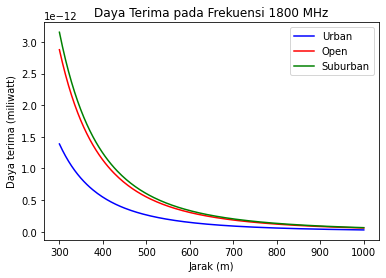

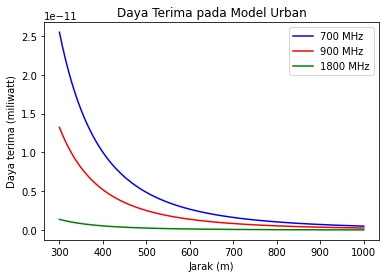

In [12]:
#PLOT PRX
#PLOT GRAFIK PRX 1
def graphprx_1():
  plt.figure()
  plt.plot(d,dict_PRX[1800]['urban'],'b', label='Urban')
  plt.plot(d,dict_PRX[1800]['open'],'r', label='Open')
  plt.plot(d,dict_PRX[1800]['suburban'],'g', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()
 
#PLOT GRAFIK PRX 2
def graphprx_2():
  plt.figure()
  plt.plot(d,dict_PRX[700],'b', label='700 MHz')
  plt.plot(d,dict_PRX[900],'r', label='900 MHz')
  plt.plot(d,dict_PRX[1800]['urban'],'g', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()
graphprx_1()
graphprx_2()

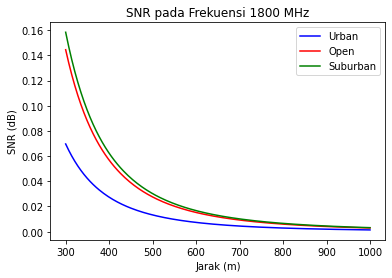

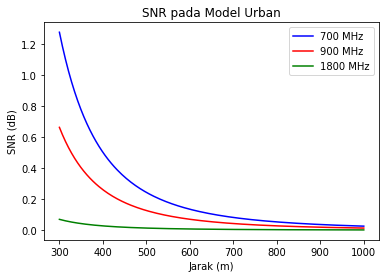

In [13]:
#PLOT SNR
#PLOT GRAFIK SNR 1
def graphsnr_1():
  plt.figure()
  plt.plot(d,dict_SNR[1800]['urban'],'b', label='Urban')
  plt.plot(d,dict_SNR[1800]['open'],'r', label='Open')
  plt.plot(d,dict_SNR[1800]['suburban'],'g', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
#PLOT GRAFIK SNR 2
def graphsnr_2():
  plt.figure()
  plt.plot(d,dict_SNR[700],'b', label='700 MHz')
  plt.plot(d,dict_SNR[900],'r', label='900 MHz')
  plt.plot(d,dict_SNR[1800]['urban'],'g', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
graphsnr_1()
graphsnr_2()

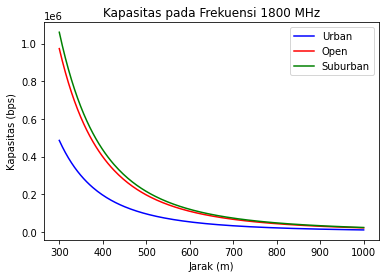

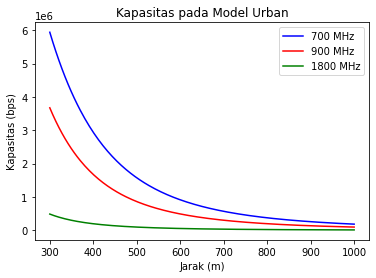

In [14]:
#PLOT KAPASITAS
#PLOT GRAFIK KAPASITAS 1
def graphcaps_1():
  plt.figure()
  plt.plot(d,dict_CAPS[1800]['urban'],'b', label='Urban')
  plt.plot(d,dict_CAPS[1800]['open'],'r', label='Open')
  plt.plot(d,dict_CAPS[1800]['suburban'],'g', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()
 
#PLOT GRAFIK PRX 2
def graphcaps_2():
  plt.figure()
  plt.plot(d,dict_CAPS[700],'b', label='700 MHz')
  plt.plot(d,dict_CAPS[900],'r', label='900 MHz')
  plt.plot(d,dict_CAPS[1800]['urban'],'g', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()
graphcaps_1()
graphcaps_2()